## Импорт модулей

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import List

import wbgapi as wb   # World Bank's data API

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import ward

from sklearn.cluster import AgglomerativeClustering

%matplotlib inline

## Функции

In [2]:
def save_as_xlsx(path: str, sheet_names: List[str], df_list: List[pd.DataFrame]) -> None:
    if len(sheet_names) != len(df_list): return

    writer = pd.ExcelWriter(path, engine="xlsxwriter")
    for i in range(len(sheet_names)):
        df_list[i].to_excel(writer, sheet_name=sheet_names[i])
    writer.close()

## Данных

Данные были взяты из API $\,$ [Всемирного банка](https://data.worldbank.org/indicator)

\[28.09.2022\]

#### Темы роста ВВП (%)

In [3]:
df_gdp_growth_data = pd.read_csv("./data/GDP_growth.csv", skiprows=4)
df_gdp_growth_data.head()

# df_gdp_growth_data = wb.data.DataFrame("NY.GDP.MKTP.KD.ZG", labels=True)
# df_gdp_growth_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.035375,6.429817,-0.020479,3.543630,2.116716,5.482371,1.267218,-2.085600,-22.318948,NaN
1,Africa Eastern and Southern,AFE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,0.239594,7.980768,5.164334,4.579952,5.327717,...,0.923067,4.200209,3.984387,2.952845,2.217017,2.557135,2.485244,2.025941,-2.886856,4.303667
2,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,12.752287,5.600745,2.724543,1.451315,2.260314,2.647003,1.189228,3.911603,-2.351101,NaN
3,Africa Western and Central,AFW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,1.848752,3.770220,7.272440,5.396349,4.049793,...,5.142997,6.104192,5.927355,2.745894,0.127844,2.317679,2.952190,3.202544,-0.897014,3.914799
4,Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,8.540000,4.950000,4.820000,0.940000,-2.580000,-0.150000,-1.316312,-0.700000,-5.500000,0.700000


#### Подушевой ВВП (current US$)

In [4]:
df_gdp_per_capita_data = pd.read_csv("./data/GDP_per_capita_growth.csv", skiprows=4)
df_gdp_per_capita_data.head()

# df_gdp_per_capita_data = wb.data.DataFrame("NY.GDP.PCAP.CD", labels=True)
# df_gdp_per_capita_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,26442.426801,26895.057167,28399.050131,28453.715565,29348.418969,30253.714235,31135.884356,23384.298791,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,162.726325,162.555968,172.271022,199.784916,180.228774,199.517228,...,1748.905594,1736.242220,1556.316469,1446.533624,1629.404273,1541.031661,1511.309259,1360.878645,1557.722682,NaN
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.773234,59.860900,58.458009,78.706429,82.095307,101.108325,...,624.315455,614.223342,556.007221,512.012778,516.679862,485.668419,494.179350,516.747871,NaN,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,107.930722,113.080062,118.829461,123.441089,131.852423,138.524029,...,2157.494584,2212.914095,1894.322115,1673.843681,1613.490478,1704.135698,1777.852822,1709.764129,1774.921218,NaN
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5127.717243,5094.112329,3127.890598,1728.023754,2313.220584,2524.942483,2177.799015,1631.431691,2137.909393,NaN


#### Темп инфляции (%)

In [5]:
df_inflation_data = pd.read_csv("./data/Inflation.csv", skiprows=4)
df_inflation_data.head()

# df_inflation_data = wb.data.DataFrame("NY.GDP.DEFL.KD.ZG", labels=True)
# df_inflation_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Inflation, GDP deflator (annual %)",NY.GDP.DEFL.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.986755,2.335109,2.531592,-1.389713,-1.753935,2.263271,5.568805,-2.902756,NaN,NaN
1,Africa Eastern and Southern,AFE,"Inflation, GDP deflator (annual %)",NY.GDP.DEFL.KD.ZG,NaN,1.861701,0.979878,3.150053,3.726978,3.569951,...,5.844111,5.560736,5.366462,6.400900,5.217431,4.085751,4.387341,4.995507,5.840394,NaN
2,Afghanistan,AFG,"Inflation, GDP deflator (annual %)",NY.GDP.DEFL.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,4.822785,0.566945,2.447563,-2.197526,2.403656,2.071349,6.521480,7.821667,NaN,NaN
3,Africa Western and Central,AFW,"Inflation, GDP deflator (annual %)",NY.GDP.DEFL.KD.ZG,NaN,3.336148,2.432663,3.013917,2.906178,2.752432,...,1.573135,0.280788,1.992846,1.784172,1.759106,2.639372,1.582290,1.128352,4.821155,NaN
4,Angola,AGO,"Inflation, GDP deflator (annual %)",NY.GDP.DEFL.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,2.844244,3.563413,-3.514972,21.774174,22.617936,28.167029,19.184276,18.036768,44.384448,NaN


## 2019 год

### Кластеризация на основании темпов роста ВВП

Выбираем нужные данные

In [6]:
df_gdp_growth_2019 = df_gdp_growth_data[["Country Name", "2019"]].dropna()
df_gdp_growth_2019 = df_gdp_growth_2019.rename({"2019": "GDP Growth"}, axis=1)
df_gdp_growth_2019.head()

,Country Name,GDP Growth
0,Aruba,-2.085600
1,Africa Eastern and Southern,2.025941
2,Afghanistan,3.911603
3,Africa Western and Central,3.202544
4,Angola,-0.700000


На основании дендрограммы определяем количество кластеров

In [7]:
number_of_cluster = 5

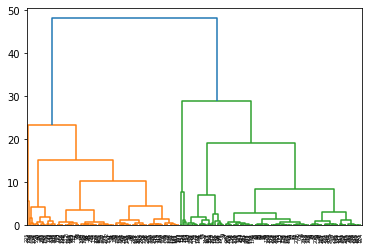

In [8]:
data_2d_gdp_growth_2019 = np.reshape(df_gdp_growth_2019["GDP Growth"].values, (len(df_gdp_growth_2019["GDP Growth"].values), 1))

dendrogram = sch.dendrogram(ward(data_2d_gdp_growth_2019))
plt.show()

Кластеризируем данные

In [9]:
hc = AgglomerativeClustering(n_clusters=number_of_cluster, affinity="euclidean", linkage="ward")

y_hc = hc.fit_predict(data_2d_gdp_growth_2019)

In [10]:
dict_names = {i: [] for i in range(number_of_cluster)}
for i in range(len(y_hc)):
    dict_names[y_hc[i]].append(df_gdp_growth_2019["Country Name"].values[i])

Название стран в кластерах

In [11]:
df_names = pd.DataFrame.from_dict(dict_names, orient="index").transpose()

In [12]:
df_names.head()

,0,1,2,3,4
0,Afghanistan,Africa Eastern and Southern,Equatorial Guinea,Timor-Leste,Aruba
1,Africa Western and Central,Albania,Lebanon,Tuvalu,Angola
2,United Arab Emirates,Andorra,Libya,None,Argentina
3,Armenia,Arab World,Northern Mariana Islands,None,American Samoa
4,Antigua and Barbuda,Australia,Zimbabwe,None,Barbados


Значения темпов роста ВВП в кластерах

In [13]:
dict_vals = {i: [df_gdp_growth_2019.loc[df_gdp_growth_2019["Country Name"] == df_names[i][j]]["GDP Growth"].values[0] for j in range(len(df_names[i].dropna()))] for i in range(number_of_cluster)}

In [14]:
df_vals = pd.DataFrame.from_dict(dict_vals, orient="index").transpose()

In [15]:
df_vals.head()

,0,1,2,3,4
0,3.911603,2.025941,-5.481823,19.535810,-2.085600
1,3.202544,2.088063,-6.914925,13.793103,-0.700000
2,3.411539,2.015548,-11.195695,NaN,-2.025934
3,7.600000,1.586319,-11.142587,NaN,-0.487805
4,4.862236,2.113149,-6.144236,NaN,-0.610275


Записываем получившиеся результаты в `excel`-файл

In [16]:
save_as_xlsx("./results/gdp_growth_2019.xlsx",
             ["Country Names", "GDP growth"],
             [df_names, df_vals])

### Кластеризация на основании подушевого ВВП, темпов роста ВВП

Выбираем нужные данные

In [17]:
df_gdp_per_capita_2019 = df_gdp_per_capita_data[["Country Name", "2019"]].dropna()
df_gdp_per_capita_2019 = df_gdp_per_capita_2019.rename({"2019": "GDP per capita"}, axis=1)
df_gdp_per_capita_2019.head()

,Country Name,GDP per capita
0,Aruba,31135.884356
1,Africa Eastern and Southern,1511.309259
2,Afghanistan,494.179350
3,Africa Western and Central,1777.852822
4,Angola,2177.799015


In [18]:
df_gdp_per_capita_gdp_growth_2019 = pd.merge(df_gdp_growth_2019, df_gdp_per_capita_2019, left_on="Country Name", right_on="Country Name", how="left")
df_gdp_per_capita_gdp_growth_2019.head()

,Country Name,GDP Growth,GDP per capita
0,Aruba,-2.085600,31135.884356
1,Africa Eastern and Southern,2.025941,1511.309259
2,Afghanistan,3.911603,494.179350
3,Africa Western and Central,3.202544,1777.852822
4,Angola,-0.700000,2177.799015


In [19]:
data_gdp_per_capita_gdp_growth_2019 = df_gdp_per_capita_gdp_growth_2019.loc[:, "GDP Growth":"GDP per capita"].values

Стандартизация показателей

In [20]:
data_gdp_per_capita_gdp_growth_2019_std = (data_gdp_per_capita_gdp_growth_2019 - data_gdp_per_capita_gdp_growth_2019.mean()) / data_gdp_per_capita_gdp_growth_2019.std()

На основании дендрограммы определяем количество кластеров

In [21]:
number_of_cluster = 5

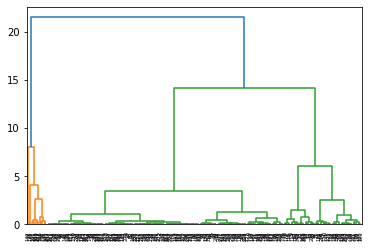

In [22]:
dendrogram = sch.dendrogram(ward(data_gdp_per_capita_gdp_growth_2019_std))
plt.show()

Кластеризируем данные

In [23]:
hc = AgglomerativeClustering(n_clusters=number_of_cluster, affinity="euclidean", linkage="ward")

y_hc = hc.fit_predict(data_gdp_per_capita_gdp_growth_2019_std)

In [24]:
dict_names = {i: [] for i in range(number_of_cluster)}
for i in range(len(y_hc)):
    dict_names[y_hc[i]].append(df_gdp_per_capita_gdp_growth_2019["Country Name"].values[i])

Название стран в кластерах

In [25]:
df_names = pd.DataFrame.from_dict(dict_names, orient="index")
df_names = df_names.transpose()

In [26]:
df_names.head()

,0,1,2,3,4
0,Bermuda,Aruba,Africa Eastern and Southern,Monaco,Andorra
1,Switzerland,Antigua and Barbuda,Afghanistan,None,United Arab Emirates
2,Cayman Islands,Bahrain,Africa Western and Central,None,Australia
3,Denmark,"Bahamas, The",Angola,None,Austria
4,Isle of Man,Barbados,Albania,None,Belgium


Значения темпов роста ВВП в кластерах

In [27]:
dict_gdp = {i: [df_gdp_per_capita_gdp_growth_2019.loc[df_gdp_per_capita_gdp_growth_2019["Country Name"] == df_names[i][j]]["GDP Growth"].values[0] for j in range(len(df_names[i].dropna()))] for i in range(number_of_cluster)}

In [28]:
df_gdp = pd.DataFrame.from_dict(dict_gdp, orient="index").transpose()

In [29]:
df_gdp.head()

,0,1,2,3,4
0,0.306267,-2.085600,2.025941,6.905665,2.015548
1,1.210992,4.862236,3.911603,NaN,3.411539
2,3.873077,2.166965,3.202544,NaN,2.113149
3,2.114664,1.896164,-0.700000,NaN,1.491211
4,0.254861,-0.610275,2.088063,NaN,2.111532


Значения подушевого ВВП в кластерах

In [30]:
dict_gdp_per_capita = {i: [df_gdp_per_capita_gdp_growth_2019.loc[df_gdp_per_capita_gdp_growth_2019["Country Name"] == df_names[i][j]]["GDP per capita"].values[0] for j in range(len(df_names[i].dropna()))] for i in range(number_of_cluster)}

In [31]:
df_gdp_per_capita = pd.DataFrame.from_dict(dict_gdp_per_capita, orient="index").transpose()

In [32]:
df_gdp_per_capita.head()

,0,1,2,3,4
0,116153.166122,31135.884356,1511.309259,189487.147128,40898.417906
1,85334.519462,17376.649677,494.179350,NaN,42701.443045
2,91513.042673,23552.379948,1777.852822,NaN,54875.285956
3,59775.735096,33872.334307,2177.799015,NaN,50114.401110
4,86481.552591,18480.056593,5396.215864,NaN,46599.111335


Записываем получившиеся результаты в `excel`-файл

In [33]:
save_as_xlsx("./results/gdp_growth_gdp_per_capita_2019.xlsx",
             ["Country Names", "GDP growth", "GDP per capita"],
             [df_names, df_gdp, df_gdp_per_capita])

### Кластеризация на основании подушевого ВВП, темпов роста ВВП, темов инфляции

Выбираем нужные данные

In [34]:
df_inflation_2019 = df_inflation_data[["Country Name", "2019"]].dropna()
df_inflation_2019 = df_inflation_2019.rename({"2019": "Inflation"}, axis=1)
df_inflation_2019.head()

,Country Name,Inflation
0,Aruba,5.568805
1,Africa Eastern and Southern,4.387341
2,Afghanistan,6.521480
3,Africa Western and Central,1.582290
4,Angola,19.184276


In [35]:
df_gdp_per_capita_gdp_growth_inflation_2019 = pd.merge(df_gdp_per_capita_gdp_growth_2019, df_inflation_2019, left_on="Country Name", right_on="Country Name", how="left")
df_gdp_per_capita_gdp_growth_inflation_2019.head()

,Country Name,GDP Growth,GDP per capita,Inflation
0,Aruba,-2.085600,31135.884356,5.568805
1,Africa Eastern and Southern,2.025941,1511.309259,4.387341
2,Afghanistan,3.911603,494.179350,6.521480
3,Africa Western and Central,3.202544,1777.852822,1.582290
4,Angola,-0.700000,2177.799015,19.184276


In [36]:
data_gdp_per_capita_gdp_growth_inflation_2019 = df_gdp_per_capita_gdp_growth_2019.loc[:, "GDP Growth":"Inflation"].values

Стандартизация показателей

In [37]:
data_gdp_per_capita_gdp_growth_inflation_2019_std = (data_gdp_per_capita_gdp_growth_inflation_2019 - data_gdp_per_capita_gdp_growth_inflation_2019.mean()) / data_gdp_per_capita_gdp_growth_inflation_2019.std()

На основании дендрограммы определяем количество кластеров

In [38]:
number_of_cluster = 5

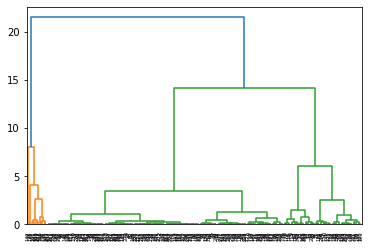

In [39]:
dendrogram = sch.dendrogram(ward(data_gdp_per_capita_gdp_growth_inflation_2019_std))
plt.show()

Кластеризируем данные

In [40]:
hc = AgglomerativeClustering(n_clusters=number_of_cluster, affinity="euclidean", linkage="ward")

y_hc = hc.fit_predict(data_gdp_per_capita_gdp_growth_inflation_2019_std)

In [41]:
dict_names = {i: [] for i in range(number_of_cluster)}
for i in range(len(y_hc)):
    dict_names[y_hc[i]].append(df_inflation_2019["Country Name"].values[i])

Название стран в кластерах

In [42]:
df_names = pd.DataFrame.from_dict(dict_names, orient="index")
df_names = df_names.transpose()

In [43]:
df_names.head()

,0,1,2,3,4
0,Bermuda,Aruba,Africa Eastern and Southern,Monaco,Andorra
1,Switzerland,Antigua and Barbuda,Afghanistan,None,United Arab Emirates
2,Cayman Islands,Bahrain,Africa Western and Central,None,Australia
3,Denmark,"Bahamas, The",Angola,None,Austria
4,Isle of Man,Barbados,Albania,None,Belgium


Значения темпов роста ВВП в кластерах

In [44]:
dict_gdp = {i: [df_gdp_per_capita_gdp_growth_inflation_2019.loc[df_gdp_per_capita_gdp_growth_inflation_2019["Country Name"] == df_names[i][j]]["GDP Growth"].values[0] for j in range(len(df_names[i].dropna()))] for i in range(number_of_cluster)}

In [45]:
df_gdp = pd.DataFrame.from_dict(dict_gdp, orient="index").transpose()

In [46]:
df_gdp.head()

,0,1,2,3,4
0,0.306267,-2.085600,2.025941,6.905665,2.015548
1,1.210992,4.862236,3.911603,NaN,3.411539
2,3.873077,2.166965,3.202544,NaN,2.113149
3,2.114664,1.896164,-0.700000,NaN,1.491211
4,0.254861,-0.610275,2.088063,NaN,2.111532


Значения подушевого ВВП в кластерах

In [47]:
dict_gdp_per_capita = {i: [df_gdp_per_capita_gdp_growth_inflation_2019.loc[df_gdp_per_capita_gdp_growth_inflation_2019["Country Name"] == df_names[i][j]]["GDP per capita"].values[0] for j in range(len(df_names[i].dropna()))] for i in range(number_of_cluster)}

In [48]:
df_gdp_per_capita = pd.DataFrame.from_dict(dict_gdp_per_capita, orient="index").transpose()

In [49]:
df_gdp_per_capita.head()

,0,1,2,3,4
0,116153.166122,31135.884356,1511.309259,189487.147128,40898.417906
1,85334.519462,17376.649677,494.179350,NaN,42701.443045
2,91513.042673,23552.379948,1777.852822,NaN,54875.285956
3,59775.735096,33872.334307,2177.799015,NaN,50114.401110
4,86481.552591,18480.056593,5396.215864,NaN,46599.111335


Значения темпа инфляции в кластерах

In [50]:
dict_inflation = {i: [df_gdp_per_capita_gdp_growth_inflation_2019.loc[df_gdp_per_capita_gdp_growth_inflation_2019["Country Name"] == df_names[i][j]]["Inflation"].values[0] for j in range(len(df_names[i].dropna()))] for i in range(number_of_cluster)}

In [51]:
df_inflation = pd.DataFrame.from_dict(dict_inflation, orient="index").transpose()

In [52]:
df_inflation.head()

,0,1,2,3,4
0,2.419352,5.568805,4.387341,1.279273,1.374754
1,-0.105745,0.208077,6.521480,NaN,-4.444037
2,3.464413,0.083262,1.582290,NaN,3.418786
3,0.742103,1.501262,19.184276,NaN,1.622589
4,1.800021,4.697597,1.256590,NaN,1.794827


Записываем получившиеся результаты в `excel`-файл

In [53]:
save_as_xlsx("./results/gdp_per_capita_gdp_growth_inflation_2019.xlsx",
             ["Country Names", "GDP growth", "GDP per capita", "Inflation"],
             [df_names, df_gdp, df_gdp_per_capita, df_inflation])

## 2013 год

### Кластеризация на основании темпов роста ВВП

Выбираем нужные данные

In [54]:
df_gdp_growth_2013 = df_gdp_growth_data[["Country Name", "2013"]].dropna()
df_gdp_growth_2013 = df_gdp_growth_2013.rename({"2013": "GDP Growth"}, axis=1)
df_gdp_growth_2013.head()

,Country Name,GDP Growth
0,Aruba,6.429817
1,Africa Eastern and Southern,4.200209
2,Afghanistan,5.600745
3,Africa Western and Central,6.104192
4,Angola,4.950000


На основании дендрограммы определяем количество кластеров

In [55]:
number_of_cluster = 4

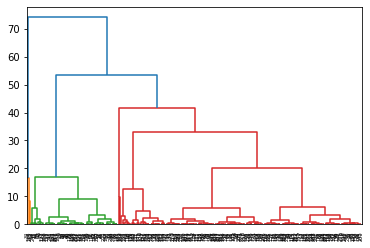

In [56]:
data_2d_gdp_growth_2013 = np.reshape(df_gdp_growth_2013["GDP Growth"].values, (len(df_gdp_growth_2013["GDP Growth"].values), 1))

dendrogram = sch.dendrogram(ward(data_2d_gdp_growth_2013))
plt.show()

Кластеризируем данные

In [57]:
hc = AgglomerativeClustering(n_clusters=number_of_cluster, affinity="euclidean", linkage="ward")

y_hc = hc.fit_predict(data_2d_gdp_growth_2013)

In [58]:
dict_names = {i: [] for i in range(number_of_cluster)}
for i in range(len(y_hc)):
    dict_names[y_hc[i]].append(df_gdp_growth_2013["Country Name"].values[i])

Название стран в кластерах

In [59]:
df_names = pd.DataFrame.from_dict(dict_names, orient="index").transpose()

In [60]:
df_names.head()

,0,1,2,3
0,Aruba,Central African Republic,Albania,Nauru
1,Africa Eastern and Southern,Libya,Andorra,Sierra Leone
2,Afghanistan,Syrian Arab Republic,American Samoa,None
3,Africa Western and Central,None,Antigua and Barbuda,None
4,Angola,None,Austria,None


Значения темпов роста ВВП в кластерах

In [61]:
dict_vals = {i: [df_gdp_growth_2013.loc[df_gdp_growth_2013["Country Name"] == df_names[i][j]]["GDP Growth"].values[0] for j in range(len(df_names[i].dropna()))] for i in range(number_of_cluster)}

In [62]:
df_vals = pd.DataFrame.from_dict(dict_vals, orient="index").transpose()

In [63]:
df_vals.head()

,0,1,2,3
0,6.429817,-36.391977,1.002018,30.612245
1,4.200209,-17.997962,-3.547597,20.715768
2,5.600745,-26.300088,-2.500000,NaN
3,6.104192,NaN,-0.600876,NaN
4,4.950000,NaN,0.025505,NaN


Записываем получившиеся результаты в `excel`-файл

In [64]:
save_as_xlsx("./results/gdp_growth_2013.xlsx",
             ["Country Names", "GDP growth"],
             [df_names, df_vals])

### Кластеризация на основании подушевого ВВП, темпов роста ВВП

Выбираем нужные данные

In [65]:
df_gdp_per_capita_2013 = df_gdp_per_capita_data[["Country Name", "2013"]].dropna()
df_gdp_per_capita_2013 = df_gdp_per_capita_2013.rename({"2013": "GDP per capita"}, axis=1)
df_gdp_per_capita_2013.head()

,Country Name,GDP per capita
0,Aruba,26442.426801
1,Africa Eastern and Southern,1748.905594
2,Afghanistan,624.315455
3,Africa Western and Central,2157.494584
4,Angola,5127.717243


In [66]:
df_gdp_per_capita_gdp_growth_2013 = pd.merge(df_gdp_growth_2013, df_gdp_per_capita_2013, left_on="Country Name", right_on="Country Name", how="left")
df_gdp_per_capita_gdp_growth_2013.head()

,Country Name,GDP Growth,GDP per capita
0,Aruba,6.429817,26442.426801
1,Africa Eastern and Southern,4.200209,1748.905594
2,Afghanistan,5.600745,624.315455
3,Africa Western and Central,6.104192,2157.494584
4,Angola,4.950000,5127.717243


In [67]:
data_gdp_per_capita_gdp_growth_2013 = df_gdp_per_capita_gdp_growth_2013.loc[:, "GDP Growth":"GDP per capita"].values

Стандартизация показателей

In [68]:
data_gdp_per_capita_gdp_growth_2013_std = (data_gdp_per_capita_gdp_growth_2013 - data_gdp_per_capita_gdp_growth_2013.mean()) / data_gdp_per_capita_gdp_growth_2013.std()

На основании дендрограммы определяем количество кластеров

In [69]:
number_of_cluster = 4

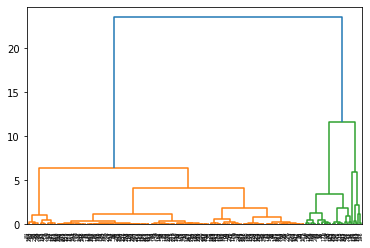

In [70]:
dendrogram = sch.dendrogram(ward(data_gdp_per_capita_gdp_growth_2013_std))
plt.show()

Кластеризируем данные

In [71]:
hc = AgglomerativeClustering(n_clusters=number_of_cluster, affinity="euclidean", linkage="ward")

y_hc = hc.fit_predict(data_gdp_per_capita_gdp_growth_2013_std)

In [72]:
dict_names = {i: [] for i in range(number_of_cluster)}
for i in range(len(y_hc)):
    dict_names[y_hc[i]].append(df_gdp_per_capita_gdp_growth_2013["Country Name"].values[i])

Название стран в кластерах

In [73]:
df_names = pd.DataFrame.from_dict(dict_names, orient="index")
df_names = df_names.transpose()

In [74]:
df_names.head()

,0,1,2,3
0,Bermuda,Africa Eastern and Southern,Andorra,Aruba
1,Switzerland,Afghanistan,United Arab Emirates,Bahrain
2,Isle of Man,Africa Western and Central,Australia,"Bahamas, The"
3,Luxembourg,Angola,Austria,Curacao
4,"Macao SAR, China",Albania,Belgium,Cyprus


Значения темпов роста ВВП в кластерах

In [75]:
dict_gdp = {i: [df_gdp_per_capita_gdp_growth_2013.loc[df_gdp_per_capita_gdp_growth_2013["Country Name"] == df_names[i][j]]["GDP Growth"].values[0] for j in range(len(df_names[i].dropna()))] for i in range(number_of_cluster)}

In [76]:
df_gdp = pd.DataFrame.from_dict(dict_gdp, orient="index").transpose()

In [77]:
df_gdp.head()

,0,1,2,3
0,-0.279709,4.200209,-3.547597,6.429817
1,1.821668,5.600745,5.053078,5.416840
2,4.141719,6.104192,2.600212,-2.863294
3,3.171790,4.950000,0.025505,-0.811687
4,10.752807,1.002018,0.459242,-6.553078


Значения подушевого ВВП в кластерах

In [78]:
dict_gdp_per_capita = {i: [df_gdp_per_capita_gdp_growth_2013.loc[df_gdp_per_capita_gdp_growth_2013["Country Name"] == df_names[i][j]]["GDP per capita"].values[0] for j in range(len(df_names[i].dropna()))] for i in range(number_of_cluster)}

In [79]:
df_gdp_per_capita = pd.DataFrame.from_dict(dict_gdp_per_capita, orient="index").transpose()

In [80]:
df_gdp_per_capita.head()

,0,1,2,3
0,99471.638898,1748.905594,39538.355206,26442.426801
1,88109.486752,624.315455,42412.636491,24744.296959
2,83357.132684,2157.494584,68156.627916,28768.772368
3,120000.140730,5127.717243,50731.127254,19762.739622
4,89260.757104,4413.062005,46757.951856,27729.193359


Записываем получившиеся результаты в `excel`-файл

In [81]:
save_as_xlsx("./results/gdp_growth_gdp_per_capita_2013.xlsx",
             ["Country Names", "GDP growth", "GDP per capita"],
             [df_names, df_gdp, df_gdp_per_capita])

### Кластеризация на основании подушевого ВВП, темпов роста ВВП, темов инфляции

Выбираем нужные данные

In [82]:
df_inflation_2013 = df_inflation_data[["Country Name", "2013"]].dropna()
df_inflation_2013 = df_inflation_2013.rename({"2013": "Inflation"}, axis=1)
df_inflation_2013.head()

,Country Name,Inflation
0,Aruba,-1.986755
1,Africa Eastern and Southern,5.844111
2,Afghanistan,4.822785
3,Africa Western and Central,1.573135
4,Angola,2.844244


In [83]:
df_gdp_per_capita_gdp_growth_inflation_2013 = pd.merge(df_gdp_per_capita_gdp_growth_2013, df_inflation_2013, left_on="Country Name", right_on="Country Name", how="left")
df_gdp_per_capita_gdp_growth_inflation_2013.head()

,Country Name,GDP Growth,GDP per capita,Inflation
0,Aruba,6.429817,26442.426801,-1.986755
1,Africa Eastern and Southern,4.200209,1748.905594,5.844111
2,Afghanistan,5.600745,624.315455,4.822785
3,Africa Western and Central,6.104192,2157.494584,1.573135
4,Angola,4.950000,5127.717243,2.844244


In [84]:
data_gdp_per_capita_gdp_growth_inflation_2013 = df_gdp_per_capita_gdp_growth_2013.loc[:, "GDP Growth":"Inflation"].values

Стандартизация показателей

In [85]:
data_gdp_per_capita_gdp_growth_inflation_2013_std = (data_gdp_per_capita_gdp_growth_inflation_2013 - data_gdp_per_capita_gdp_growth_inflation_2013.mean()) / data_gdp_per_capita_gdp_growth_inflation_2013.std()

На основании дендрограммы определяем количество кластеров

In [86]:
number_of_cluster = 5

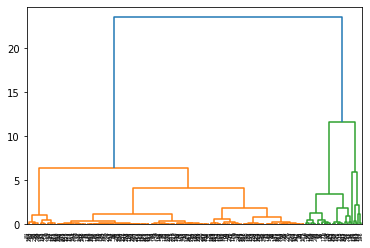

In [87]:
dendrogram = sch.dendrogram(ward(data_gdp_per_capita_gdp_growth_inflation_2013_std))
plt.show()

Кластеризируем данные

In [88]:
hc = AgglomerativeClustering(n_clusters=number_of_cluster, affinity="euclidean", linkage="ward")

y_hc = hc.fit_predict(data_gdp_per_capita_gdp_growth_inflation_2013_std)

In [89]:
dict_names = {i: [] for i in range(number_of_cluster)}
for i in range(len(y_hc)):
    dict_names[y_hc[i]].append(df_inflation_2013["Country Name"].values[i])

Название стран в кластерах

In [90]:
df_names = pd.DataFrame.from_dict(dict_names, orient="index")
df_names = df_names.transpose()

In [91]:
df_names.head()

,0,1,2,3,4
0,Africa Eastern and Southern,Bermuda,Andorra,Aruba,Monaco
1,Afghanistan,Switzerland,United Arab Emirates,Bahrain,None
2,Africa Western and Central,Isle of Man,Australia,"Bahamas, The",None
3,Angola,Luxembourg,Austria,Curacao,None
4,Albania,"Macao SAR, China",Belgium,Cyprus,None


Значения темпов роста ВВП в кластерах

In [92]:
dict_gdp = {i: [df_gdp_per_capita_gdp_growth_inflation_2013.loc[df_gdp_per_capita_gdp_growth_inflation_2013["Country Name"] == df_names[i][j]]["GDP Growth"].values[0] for j in range(len(df_names[i].dropna()))] for i in range(number_of_cluster)}

In [93]:
df_gdp = pd.DataFrame.from_dict(dict_gdp, orient="index").transpose()

In [94]:
df_gdp.head()

,0,1,2,3,4
0,4.200209,-0.279709,-3.547597,6.429817,9.574891
1,5.600745,1.821668,5.053078,5.416840,NaN
2,6.104192,4.141719,2.600212,-2.863294,NaN
3,4.950000,3.171790,0.025505,-0.811687,NaN
4,1.002018,10.752807,0.459242,-6.553078,NaN


Значения подушевого ВВП в кластерах

In [95]:
dict_gdp_per_capita = {i: [df_gdp_per_capita_gdp_growth_inflation_2013.loc[df_gdp_per_capita_gdp_growth_inflation_2013["Country Name"] == df_names[i][j]]["GDP per capita"].values[0] for j in range(len(df_names[i].dropna()))] for i in range(number_of_cluster)}

In [96]:
df_gdp_per_capita = pd.DataFrame.from_dict(dict_gdp_per_capita, orient="index").transpose()

In [97]:
df_gdp_per_capita.head()

,0,1,2,3,4
0,1748.905594,99471.638898,39538.355206,26442.426801,177673.745368
1,624.315455,88109.486752,42412.636491,24744.296959,NaN
2,2157.494584,83357.132684,68156.627916,28768.772368,NaN
3,5127.717243,120000.140730,50731.127254,19762.739622,NaN
4,4413.062005,89260.757104,46757.951856,27729.193359,NaN


Значения темпа инфляции в кластерах

In [98]:
dict_inflation = {i: [df_gdp_per_capita_gdp_growth_inflation_2013.loc[df_gdp_per_capita_gdp_growth_inflation_2013["Country Name"] == df_names[i][j]]["Inflation"].values[0] for j in range(len(df_names[i].dropna()))] for i in range(number_of_cluster)}

In [99]:
df_inflation = pd.DataFrame.from_dict(dict_inflation, orient="index").transpose()

In [100]:
df_inflation.head()

,0,1,2,3,4
0,5.844111,1.657273,0.448492,-1.986755,0.780385
1,4.822785,-0.023308,-0.866918,0.384140,NaN
2,1.573135,1.535803,-0.152592,1.433321,NaN
3,2.844244,2.276024,1.623888,1.332300,NaN
4,0.288746,7.732683,1.271258,-0.945905,NaN


Записываем получившиеся результаты в `excel`-файл

In [101]:
save_as_xlsx("./results/gdp_per_capita_gdp_growth_inflation_2013.xlsx",
             ["Country Names", "GDP growth", "GDP per capita", "Inflation"],
             [df_names, df_gdp, df_gdp_per_capita, df_inflation])

## 2013 - 2019 года

### Кластеризация на основании темпов роста ВВП

Выбираем нужные данные

In [102]:
df_mean = pd.DataFrame(df_gdp_growth_data.loc[:, "2013":"2019"].dropna().mean(axis=1)).rename({0: "Mean GDP Growth"}, axis=1)
df_mean.head()

,Mean GDP Growth
0,2.390525
1,2.917540
2,2.826393
3,3.339671
4,0.851955


In [103]:
df_mean_gdp_growth_2013_2019 = pd.merge(df_gdp_growth_data["Country Name"], df_mean, left_index=True, right_index=True)
df_mean_gdp_growth_2013_2019.head()

,Country Name,Mean GDP Growth
0,Aruba,2.390525
1,Africa Eastern and Southern,2.917540
2,Afghanistan,2.826393
3,Africa Western and Central,3.339671
4,Angola,0.851955


На основании дендрограммы определяем количество кластеров

In [104]:
number_of_cluster = 7

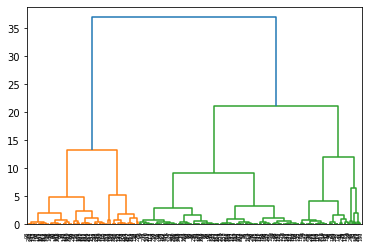

In [105]:
data_2d_mean_gdp_growth_2013_2019 = np.reshape(df_mean_gdp_growth_2013_2019["Mean GDP Growth"].values, (len(df_mean_gdp_growth_2013_2019["Mean GDP Growth"].values), 1))

dendrogram = sch.dendrogram(ward(data_2d_mean_gdp_growth_2013_2019))
plt.show()

Кластеризируем данные

In [106]:
hc = AgglomerativeClustering(n_clusters=number_of_cluster, affinity="euclidean", linkage="ward")

y_hc = hc.fit_predict(data_2d_mean_gdp_growth_2013_2019)

In [107]:
dict_names = {i: [] for i in range(number_of_cluster)}
for i in range(len(y_hc)):
    dict_names[y_hc[i]].append(df_mean_gdp_growth_2013_2019["Country Name"].values[i])

Название стран в кластерах

In [108]:
df_names = pd.DataFrame.from_dict(dict_names, orient="index").transpose()

In [109]:
df_names.head()

,0,1,2,3,4,5,6
0,Bangladesh,Armenia,Africa Eastern and Southern,Central African Republic,Angola,Aruba,Equatorial Guinea
1,China,Benin,Afghanistan,"Congo, Rep.",Andorra,Albania,"Yemen, Rep."
2,Cote d'Ivoire,Burkina Faso,Africa Western and Central,Curacao,Argentina,Arab World,None
3,East Asia & Pacific (excluding high income),Bolivia,United Arab Emirates,Libya,American Samoa,Australia,None
4,Ethiopia,Bhutan,Antigua and Barbuda,Puerto Rico,Burundi,Austria,None


Значения темпов роста ВВП в кластерах

In [110]:
dict_vals = {i: [df_mean_gdp_growth_2013_2019.loc[df_mean_gdp_growth_2013_2019["Country Name"] == df_names[i][j]]["Mean GDP Growth"].values[0] for j in range(len(df_names[i].dropna()))] for i in range(number_of_cluster)}

In [111]:
df_vals = pd.DataFrame.from_dict(dict_vals, orient="index").transpose()

In [112]:
df_vals.head()

,0,1,2,3,4,5,6
0,6.790337,4.371429,2.917540,-2.258107,0.851955,2.390525,-5.575781
1,6.961354,5.414491,2.826393,-2.514906,1.150153,2.602832,-5.093454
2,7.855306,5.499259,3.339671,-1.409431,-0.183041,2.333355,NaN
3,6.651510,4.573318,3.497523,-2.019556,-0.581604,2.479577,NaN
4,9.344305,5.161124,3.915258,-1.336893,1.226763,1.420299,NaN


Записываем получившиеся результаты в `excel`-файл

In [113]:
save_as_xlsx("./results/mean_gdp_growth_2013_2019.xlsx",
             ["Country Names", "Mean GDP growth"],
             [df_names, df_vals])

### Кластеризация на основании подушевого ВВП, темпов роста ВВП

Выбираем нужные данные

In [114]:
df_mean_gdp_per_capita_2013_2019 = pd.DataFrame(df_gdp_per_capita_data.loc[:, "2013":"2019"].dropna().mean(axis=1)).rename({0: "Mean GDP per capita"}, axis=1)
df_mean_gdp_per_capita_2013_2019.head()

,Mean GDP per capita
0,28704.038175
1,1595.677586
2,543.298061
3,1862.007639
4,3156.243715


In [115]:
df_mean_gdp_growth_gdp_per_capita_2013_2019 = pd.merge(df_mean_gdp_growth_2013_2019, df_mean_gdp_per_capita_2013_2019, left_index=True, right_index=True)
df_mean_gdp_growth_gdp_per_capita_2013_2019.head()

,Country Name,Mean GDP Growth,Mean GDP per capita
0,Aruba,2.390525,28704.038175
1,Africa Eastern and Southern,2.917540,1595.677586
2,Afghanistan,2.826393,543.298061
3,Africa Western and Central,3.339671,1862.007639
4,Angola,0.851955,3156.243715


In [116]:
data_mean_gdp_growth_gdp_per_capita_2013_2019 = df_mean_gdp_growth_gdp_per_capita_2013_2019.loc[:, "Mean GDP Growth":"Mean GDP per capita"].values

Стандартизация показателей

In [117]:
data_mean_gdp_growth_gdp_per_capita_2013_2019_std = (data_mean_gdp_growth_gdp_per_capita_2013_2019 - data_mean_gdp_growth_gdp_per_capita_2013_2019.mean()) / data_mean_gdp_growth_gdp_per_capita_2013_2019.std()

На основании дендрограммы определяем количество кластеров

In [118]:
number_of_cluster = 7

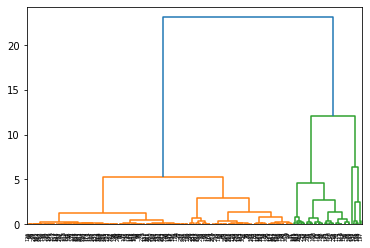

In [119]:
dendrogram = sch.dendrogram(ward(data_mean_gdp_growth_gdp_per_capita_2013_2019_std))
plt.show()

Кластеризируем данные

In [120]:
hc = AgglomerativeClustering(n_clusters=number_of_cluster, affinity="euclidean", linkage="ward")

y_hc = hc.fit_predict(data_mean_gdp_growth_gdp_per_capita_2013_2019_std)

In [121]:
dict_names = {i: [] for i in range(number_of_cluster)}
for i in range(len(y_hc)):
    dict_names[y_hc[i]].append(df_mean_gdp_growth_gdp_per_capita_2013_2019["Country Name"].values[i])

Название стран в кластерах

In [122]:
df_names = pd.DataFrame.from_dict(dict_names, orient="index")
df_names = df_names.transpose()

In [123]:
df_names.head()

,0,1,2,3,4,5,6
0,Aruba,Bermuda,Arab World,Monaco,Africa Eastern and Southern,Australia,Bahrain
1,Andorra,Switzerland,Argentina,None,Afghanistan,Denmark,Barbados
2,United Arab Emirates,Cayman Islands,American Samoa,None,Africa Western and Central,Ireland,Curacao
3,Austria,Isle of Man,Antigua and Barbuda,None,Angola,Iceland,Czech Republic
4,Belgium,Luxembourg,Bulgaria,None,Albania,North America,Europe & Central Asia


Значения темпов роста ВВП в кластерах

In [124]:
dict_gdp = {i: [df_mean_gdp_growth_gdp_per_capita_2013_2019.loc[df_mean_gdp_growth_gdp_per_capita_2013_2019["Country Name"] == df_names[i][j]]["Mean GDP Growth"].values[0] for j in range(len(df_names[i].dropna()))] for i in range(number_of_cluster)}

In [125]:
df_gdp = pd.DataFrame.from_dict(dict_gdp, orient="index").transpose()

In [126]:
df_gdp.head()

,0,1,2,3,4,5,6
0,2.390525,-0.053938,2.333355,4.920011,2.917540,2.479577,3.482826
1,1.150153,1.954884,-0.183041,NaN,2.826393,2.152460,0.327122
2,3.497523,3.047335,-0.581604,NaN,3.339671,8.583767,-1.409431
3,1.420299,3.288659,3.915258,NaN,0.851955,4.071711,3.076960
4,1.560133,2.806889,2.336942,NaN,2.602832,2.263954,1.954569


Значения подушевого ВВП в кластерах

In [127]:
dict_gdp_per_capita = {i: [df_mean_gdp_growth_gdp_per_capita_2013_2019.loc[df_mean_gdp_growth_gdp_per_capita_2013_2019["Country Name"] == df_names[i][j]]["Mean GDP per capita"].values[0] for j in range(len(df_names[i].dropna()))] for i in range(number_of_cluster)}

In [128]:
df_gdp_per_capita = pd.DataFrame.from_dict(dict_gdp_per_capita, orient="index").transpose()

In [129]:
df_gdp_per_capita.head()

,0,1,2,3,4,5,6
0,28704.038175,106836.473070,6698.313795,178015.298903,1595.677586,57606.774261,23765.413096
1,39391.828657,85816.947093,12639.844618,NaN,543.298061,58662.399332,17153.795510
2,41450.753953,80352.524290,11616.366447,NaN,1862.007639,65967.894159,19175.226152
3,48721.577851,86012.561547,15048.008861,NaN,3156.243715,62106.107286,20592.157682
4,45127.106369,113815.259501,8274.306123,NaN,4611.921725,57496.854226,24504.657031


Записываем получившиеся результаты в `excel`-файл

In [130]:
save_as_xlsx("./results/mean_gdp_growth_gdp_per_capita_2013_2019.xlsx",
             ["Country Names", "GDP growth", "GDP per capita"],
             [df_names, df_gdp, df_gdp_per_capita])

### Кластеризация на основании подушевого ВВП, темпов роста ВВП, темов инфляции

Выбираем нужные данные

In [131]:
df_mean_inflation_2013_2019 = pd.DataFrame(df_inflation_data.loc[:, "2013":"2019"].dropna().mean(axis=1)).rename({0: "Mean Inflation"}, axis=1)
df_mean_inflation_2013_2019.head()

,Mean Inflation
0,1.081196
1,5.266105
2,2.376607
3,1.658816
4,13.519443


In [132]:
df_mean_gdp_growth_gdp_per_capita_inflation_2013_2019 = pd.merge(df_mean_gdp_growth_gdp_per_capita_2013_2019, df_mean_inflation_2013_2019, left_index=True, right_index=True)
df_mean_gdp_growth_gdp_per_capita_inflation_2013_2019.head()

,Country Name,Mean GDP Growth,Mean GDP per capita,Mean Inflation
0,Aruba,2.390525,28704.038175,1.081196
1,Africa Eastern and Southern,2.917540,1595.677586,5.266105
2,Afghanistan,2.826393,543.298061,2.376607
3,Africa Western and Central,3.339671,1862.007639,1.658816
4,Angola,0.851955,3156.243715,13.519443


In [133]:
data_mean_gdp_growth_gdp_per_capita_inflation_2013_2019 = df_mean_gdp_growth_gdp_per_capita_inflation_2013_2019.loc[:, "Mean GDP Growth":"Mean Inflation"].values

Стандартизация показателей

In [134]:
data_mean_gdp_growth_gdp_per_capita_inflation_2013_2019_std = (data_mean_gdp_growth_gdp_per_capita_inflation_2013_2019 - data_mean_gdp_growth_gdp_per_capita_inflation_2013_2019.mean()) / data_mean_gdp_growth_gdp_per_capita_inflation_2013_2019.std()

На основании дендрограммы определяем количество кластеров

In [135]:
number_of_cluster = 7

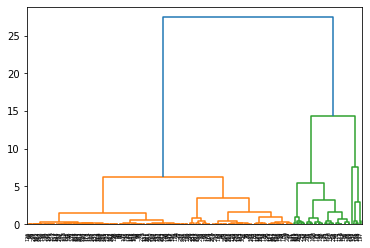

In [136]:
dendrogram = sch.dendrogram(ward(data_mean_gdp_growth_gdp_per_capita_inflation_2013_2019_std))
plt.show()

Кластеризируем данные

In [137]:
hc = AgglomerativeClustering(n_clusters=number_of_cluster, affinity="euclidean", linkage="ward")

y_hc = hc.fit_predict(data_mean_gdp_growth_gdp_per_capita_inflation_2013_2019_std)

In [138]:
dict_names = {i: [] for i in range(number_of_cluster)}
for i in range(len(y_hc)):
    dict_names[y_hc[i]].append(df_mean_gdp_growth_gdp_per_capita_inflation_2013_2019["Country Name"].values[i])

Название стран в кластерах

In [139]:
df_names = pd.DataFrame.from_dict(dict_names, orient="index")
df_names = df_names.transpose()

In [140]:
df_names.head()

,0,1,2,3,4,5,6
0,Aruba,Bermuda,Arab World,Monaco,Africa Eastern and Southern,Australia,Bahrain
1,Andorra,Switzerland,Argentina,None,Afghanistan,Denmark,Barbados
2,United Arab Emirates,Cayman Islands,American Samoa,None,Africa Western and Central,Ireland,Curacao
3,Austria,Isle of Man,Antigua and Barbuda,None,Angola,Iceland,Czech Republic
4,Belgium,Luxembourg,Bulgaria,None,Albania,North America,Europe & Central Asia


Значения темпов роста ВВП в кластерах

In [141]:
dict_gdp = {i: [df_mean_gdp_growth_gdp_per_capita_inflation_2013_2019.loc[df_mean_gdp_growth_gdp_per_capita_inflation_2013_2019["Country Name"] == df_names[i][j]]["Mean GDP Growth"].values[0] for j in range(len(df_names[i].dropna()))] for i in range(number_of_cluster)}

In [142]:
df_gdp = pd.DataFrame.from_dict(dict_gdp, orient="index").transpose()

In [143]:
df_gdp.head()

,0,1,2,3,4,5,6
0,2.390525,-0.053938,2.333355,4.920011,2.917540,2.479577,3.482826
1,1.150153,1.954884,-0.183041,NaN,2.826393,2.152460,0.327122
2,3.497523,3.047335,-0.581604,NaN,3.339671,8.583767,-1.409431
3,1.420299,3.288659,3.915258,NaN,0.851955,4.071711,3.076960
4,1.560133,2.806889,2.336942,NaN,2.602832,2.263954,1.954569


Значения подушевого ВВП в кластерах

In [144]:
dict_gdp_per_capita = {i: [df_mean_gdp_growth_gdp_per_capita_inflation_2013_2019.loc[df_mean_gdp_growth_gdp_per_capita_inflation_2013_2019["Country Name"] == df_names[i][j]]["Mean GDP per capita"].values[0] for j in range(len(df_names[i].dropna()))] for i in range(number_of_cluster)}

In [145]:
df_gdp_per_capita = pd.DataFrame.from_dict(dict_gdp_per_capita, orient="index").transpose()

In [146]:
df_gdp_per_capita.head()

,0,1,2,3,4,5,6
0,28704.038175,106836.473070,6698.313795,178015.298903,1595.677586,57606.774261,23765.413096
1,39391.828657,85816.947093,12639.844618,NaN,543.298061,58662.399332,17153.795510
2,41450.753953,80352.524290,11616.366447,NaN,1862.007639,65967.894159,19175.226152
3,48721.577851,86012.561547,15048.008861,NaN,3156.243715,62106.107286,20592.157682
4,45127.106369,113815.259501,8274.306123,NaN,4611.921725,57496.854226,24504.657031


Значения темпа инфляции в кластерах

In [147]:
dict_inflation = {i: [df_mean_gdp_growth_gdp_per_capita_inflation_2013_2019.loc[df_mean_gdp_growth_gdp_per_capita_inflation_2013_2019["Country Name"] == df_names[i][j]]["Mean Inflation"].values[0] for j in range(len(df_names[i].dropna()))] for i in range(number_of_cluster)}

In [148]:
df_inflation = pd.DataFrame.from_dict(dict_inflation, orient="index").transpose()

In [149]:
df_inflation.head()

,0,1,2,3,4,5,6
0,1.081196,2.275718,2.393874,0.830066,5.266105,1.295595,-0.047373
1,0.699514,-0.306675,35.841813,NaN,2.376607,0.754651,1.724627
2,-1.609904,1.674420,0.831001,NaN,1.658816,2.164764,1.300493
3,1.768418,1.126335,1.069595,NaN,13.519443,3.251564,1.977397
4,1.519755,1.519426,3.137333,NaN,0.850102,1.569828,1.660180


Записываем получившиеся результаты в `excel`-файл

In [150]:
save_as_xlsx("./results/mean_gdp_growth_gdp_per_capita_inflation_2013_2019.xlsx",
             ["Country Names", "GDP growth", "GDP per capita", "Inflation"],
             [df_names, df_gdp, df_gdp_per_capita, df_inflation])